# MMF Colab Demo

This notebook provides step-by-step instructions on how to use MMF to build new models and uses the Hateful Memes (HM) dataset for this specific tutorial.

Follow these links to learn more about MMF:
- [MMF Blog Post]()
- [GitHub repo](https://github.com/facebookresearch/mmf)
- [Website](https://mmf.sh) and [Documentation](https://mmf.rtfd.io)

In general, the notebook demonstrates how to:

1. [Download MMF](#scrollTo=l7Eo9ZqTDW3I)
2. [Download the HM dataset](#scrollTo=nYyXt9dzEBEU&line=12&uniqifier=1)
3. [Test pretrained models on HM](#scrollTo=nYyXt9dzEBEU&line=12&uniqifier=1)
4. [Submit a prediction](#scrollTo=uhKvYHtWHlyr&line=3&uniqifier=1)
5. [Train existing model on HM](#scrollTo=) 
6. [Build your model](#scrollTo=)
7. [Train your model on HM](#scrollTo=) 

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

from mmf.utils.env import setup_imports
setup_imports()

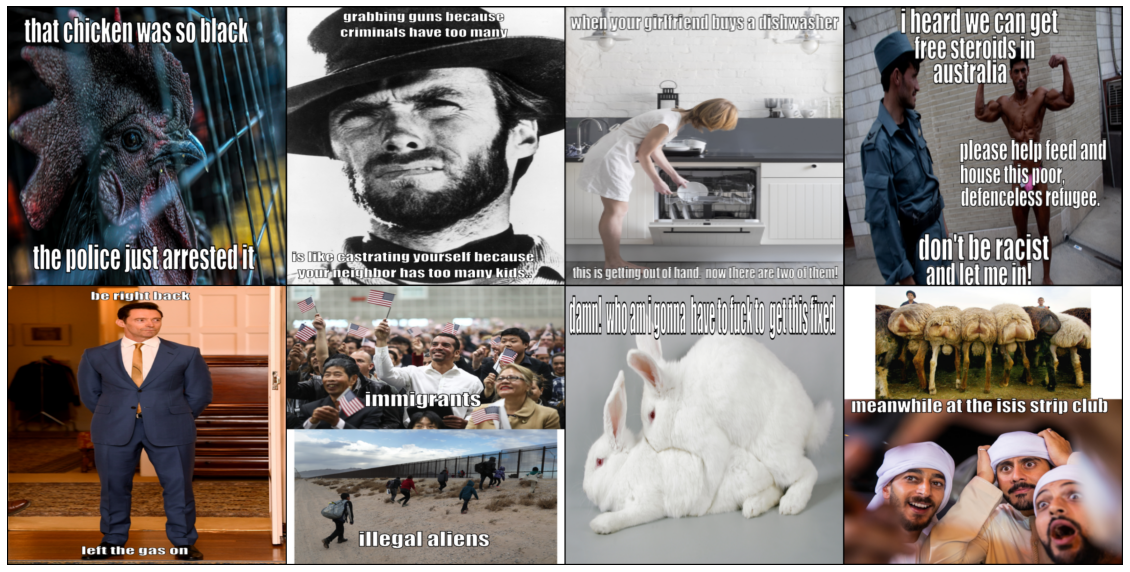

In [2]:
from mmf.common.registry import registry
from mmf.models.mmbt import MMBT
from mmf.utils.build import build_dataset

dataset = build_dataset("hateful_memes")

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 20)
dataset.visualize(num_samples=8, size=(512, 512), nrow=4)

# late fusion

In [4]:
!mmf_run config="./configs/late_fusion_defaults_early_stop.yaml" \
  model=late_fusion \
  dataset=hateful_memes \
  run_type=train_val \
  training.log_interval=100 \
  training.max_updates=22000 \
  training.batch_size=64 \
  training.evaluation_interval=500 \
  training.tensorboard=True \
  env.tensorboard_logdir="tensorboard/logs/fit/" \
  training.checkpoint_interval=100 \
  checkpoint.resume_zoo=late_fusion.hateful_memes \
  dataset_config.hateful_memes.annotations.train[0]="hateful_memes/defaults/annotations/train.jsonl" \
  dataset_config.hateful_memes.annotations.val[0]="hateful_memes/defaults/annotations/dev_unseen.jsonl" \
  dataset_config.hateful_memes.annotations.test[0]="hateful_memes/defaults/annotations/test_unseen.jsonl"

2021-05-02T22:08:43 | mmf.utils.configuration: Overriding option config to ./configs/late_fusion_defaults_early_stop.yaml
2021-05-02T22:08:43 | mmf.utils.configuration: Overriding option model to late_fusion
2021-05-02T22:08:43 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2021-05-02T22:08:43 | mmf.utils.configuration: Overriding option run_type to train_val
2021-05-02T22:08:43 | mmf.utils.configuration: Overriding option training.log_interval to 100
2021-05-02T22:08:43 | mmf.utils.configuration: Overriding option training.max_updates to 22000
2021-05-02T22:08:43 | mmf.utils.configuration: Overriding option training.batch_size to 64
2021-05-02T22:08:43 | mmf.utils.configuration: Overriding option training.evaluation_interval to 500
2021-05-02T22:08:43 | mmf.utils.configuration: Overriding option training.tensorboard to True
2021-05-02T22:08:43 | mmf.utils.configuration: Overriding option env.tensorboard_logdir to tensorboard/logs/fit/
2021-05-02T22:08:43 | mmf.

            (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (conv3): Conv2d(512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn3): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (relu): ReLU(inplace=True)
          )
        )
      )
      (pool): AdaptiveAvgPool2d(output_size=(1, 1))
    )
  )
  (modal_classifier): MLPClassifer(
    (layers): ModuleList(
      (0): Linear(in_features=2048, out_features=768, bias=True)
      (1): BatchNorm1d(768, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.5, inplace=False)
      (4): Linear(in_features=768, out_features=768, bias=True)
      (5): BatchNorm1d(768, eps=1e-05, 

2021-05-02T22:17:32 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T22:17:34 | mmf.utils.checkpoint: Checkpoint save operation finished!
2021-05-02T22:17:34 | mmf.trainers.callbacks.logistics: progress: 500/22000, train/hateful_memes/cross_entropy: 0.0779, train/hateful_memes/cross_entropy/avg: 0.0923, train/total_loss: 0.0779, train/total_loss/avg: 0.0923, max mem: 20357.0, experiment: run, epoch: 4, num_updates: 500, iterations: 500, max_updates: 22000, lr: 0.00003, ups: 1.30, time: 01m 17s 936ms, time_since_start: 07m 40s 670ms, eta: 04h 44m 18s 032ms
2021-05-02T22:17:34 | mmf.trainers.core.training_loop: Evaluation time. Running on full validation set...
2021-05-02T22:17:34 | mmf.common.test_reporter: Predicting for hateful_memes
2021-05-02T22:17:37 | mmf.trainers.core.evaluation_loop: Finished training. Loaded 9
2021-05-02T22:17:37 | mmf.trainers.core.evaluation_loop:  -- skipped 0 batches.
2021-05-02T22:17:37 | mmf.utils.checkpoint: Checkpoint save operation started!

2021-05-02T22:24:21 | mmf.trainers.core.evaluation_loop: Finished training. Loaded 9
2021-05-02T22:24:21 | mmf.trainers.core.evaluation_loop:  -- skipped 0 batches.
2021-05-02T22:24:21 | mmf.utils.checkpoint: Checkpoint save operation started!
WARNING 2021-05-02T22:24:21 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)

WARNING 2021-05-02T22:24:21 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)

2021-05-02T22:24:24 | mmf.utils.checkpoint: Saving best checkpoint
2021-05-02T22:24:27 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T22:24:30 | mmf.utils.checkpoin

2021-05-02T22:31:07 | mmf.trainers.core.evaluation_loop: Finished training. Loaded 9
2021-05-02T22:31:07 | mmf.trainers.core.evaluation_loop:  -- skipped 0 batches.
2021-05-02T22:31:07 | mmf.utils.checkpoint: Checkpoint save operation started!
WARNING 2021-05-02T22:31:07 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)

WARNING 2021-05-02T22:31:07 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)

2021-05-02T22:31:11 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T22:31:14 | mmf.utils.checkpoint: Checkpoint save operation finished!
2021-05-02T22:31:14 | mmf.tr

2021-05-02T22:40:30 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T22:40:33 | mmf.utils.checkpoint: Checkpoint save operation finished!
2021-05-02T22:40:33 | mmf.trainers.callbacks.logistics: progress: 2200/22000, train/hateful_memes/cross_entropy: 0.0122, train/hateful_memes/cross_entropy/avg: 0.0407, train/total_loss: 0.0122, train/total_loss/avg: 0.0407, max mem: 20357.0, experiment: run, epoch: 17, num_updates: 2200, iterations: 2200, max_updates: 22000, lr: 0.00005, ups: 1.28, time: 01m 18s 766ms, time_since_start: 30m 38s 754ms, eta: 04h 24m 36s 493ms
2021-05-02T22:41:46 | mmf.trainers.callbacks.checkpoint: Checkpoint time. Saving a checkpoint.
2021-05-02T22:41:46 | mmf.utils.checkpoint: Checkpoint save operation started!
WARNING 2021-05-02T22:41:46 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warning

2021-05-02T22:47:12 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T22:47:15 | mmf.utils.checkpoint: Checkpoint save operation finished!
2021-05-02T22:47:15 | mmf.trainers.callbacks.logistics: progress: 2700/22000, train/hateful_memes/cross_entropy: 0.0026, train/hateful_memes/cross_entropy/avg: 0.0333, train/total_loss: 0.0026, train/total_loss/avg: 0.0333, max mem: 20357.0, experiment: run, epoch: 21, num_updates: 2700, iterations: 2700, max_updates: 22000, lr: 0.00005, ups: 1.27, time: 01m 19s 114ms, time_since_start: 37m 21s 634ms, eta: 04h 19m 04s 016ms
2021-05-02T22:48:29 | mmf.trainers.callbacks.checkpoint: Checkpoint time. Saving a checkpoint.
2021-05-02T22:48:29 | mmf.utils.checkpoint: Checkpoint save operation started!
WARNING 2021-05-02T22:48:29 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warning

2021-05-02T22:53:55 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T22:53:58 | mmf.utils.checkpoint: Checkpoint save operation finished!
2021-05-02T22:53:58 | mmf.trainers.callbacks.logistics: progress: 3200/22000, train/hateful_memes/cross_entropy: 0.0014, train/hateful_memes/cross_entropy/avg: 0.0418, train/total_loss: 0.0014, train/total_loss/avg: 0.0418, max mem: 20357.0, experiment: run, epoch: 25, num_updates: 3200, iterations: 3200, max_updates: 22000, lr: 0.00005, ups: 1.27, time: 01m 19s 048ms, time_since_start: 44m 04s 134ms, eta: 04h 12m 08s 610ms
2021-05-02T22:55:11 | mmf.trainers.callbacks.checkpoint: Checkpoint time. Saving a checkpoint.
2021-05-02T22:55:11 | mmf.utils.checkpoint: Checkpoint save operation started!
WARNING 2021-05-02T22:55:11 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warning

2021-05-02T23:00:32 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T23:00:35 | mmf.utils.checkpoint: Checkpoint save operation finished!
2021-05-02T23:00:35 | mmf.trainers.callbacks.logistics: progress: 3700/22000, train/hateful_memes/cross_entropy: 0.0014, train/hateful_memes/cross_entropy/avg: 0.0388, train/total_loss: 0.0014, train/total_loss/avg: 0.0388, max mem: 20357.0, experiment: run, epoch: 28, num_updates: 3700, iterations: 3700, max_updates: 22000, lr: 0.00005, ups: 1.32, time: 01m 16s 972ms, time_since_start: 50m 40s 974ms, eta: 03h 58m 59s 456ms
2021-05-02T23:01:47 | mmf.trainers.callbacks.checkpoint: Checkpoint time. Saving a checkpoint.
2021-05-02T23:01:47 | mmf.utils.checkpoint: Checkpoint save operation started!
WARNING 2021-05-02T23:01:47 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warning

2021-05-02T23:07:08 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T23:07:11 | mmf.utils.checkpoint: Checkpoint save operation finished!
2021-05-02T23:07:11 | mmf.trainers.callbacks.logistics: progress: 4200/22000, train/hateful_memes/cross_entropy: 0.0012, train/hateful_memes/cross_entropy/avg: 0.0344, train/total_loss: 0.0012, train/total_loss/avg: 0.0344, max mem: 20357.0, experiment: run, epoch: 32, num_updates: 4200, iterations: 4200, max_updates: 22000, lr: 0.00005, ups: 1.30, time: 01m 17s 651ms, time_since_start: 57m 16s 983ms, eta: 03h 54m 30s 827ms
2021-05-02T23:08:24 | mmf.trainers.callbacks.checkpoint: Checkpoint time. Saving a checkpoint.
2021-05-02T23:08:24 | mmf.utils.checkpoint: Checkpoint save operation started!
WARNING 2021-05-02T23:08:24 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warning

2021-05-02T23:13:48 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T23:13:51 | mmf.utils.checkpoint: Checkpoint save operation finished!
2021-05-02T23:13:51 | mmf.trainers.callbacks.logistics: progress: 4700/22000, train/hateful_memes/cross_entropy: 0.0012, train/hateful_memes/cross_entropy/avg: 0.0308, train/total_loss: 0.0012, train/total_loss/avg: 0.0308, max mem: 20357.0, experiment: run, epoch: 36, num_updates: 4700, iterations: 4700, max_updates: 22000, lr: 0.00005, ups: 1.28, time: 01m 18s 235ms, time_since_start: 01h 03m 56s 847ms, eta: 03h 49m 38s 416ms
2021-05-02T23:15:04 | mmf.trainers.callbacks.checkpoint: Checkpoint time. Saving a checkpoint.
2021-05-02T23:15:04 | mmf.utils.checkpoint: Checkpoint save operation started!
WARNING 2021-05-02T23:15:04 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  war

2021-05-02T23:20:30 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T23:20:33 | mmf.utils.checkpoint: Checkpoint save operation finished!
2021-05-02T23:20:33 | mmf.trainers.callbacks.logistics: progress: 5200/22000, train/hateful_memes/cross_entropy: 0.0024, train/hateful_memes/cross_entropy/avg: 0.0336, train/total_loss: 0.0024, train/total_loss/avg: 0.0336, max mem: 20357.0, experiment: run, epoch: 40, num_updates: 5200, iterations: 5200, max_updates: 22000, lr: 0.00005, ups: 1.27, time: 01m 19s 372ms, time_since_start: 01h 10m 39s 234ms, eta: 03h 46m 14s 547ms
2021-05-02T23:21:46 | mmf.trainers.callbacks.checkpoint: Checkpoint time. Saving a checkpoint.
2021-05-02T23:21:46 | mmf.utils.checkpoint: Checkpoint save operation started!
WARNING 2021-05-02T23:21:46 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  war

2021-05-02T23:27:12 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T23:27:15 | mmf.utils.checkpoint: Checkpoint save operation finished!
2021-05-02T23:27:15 | mmf.trainers.callbacks.logistics: progress: 5700/22000, train/hateful_memes/cross_entropy: 0.0021, train/hateful_memes/cross_entropy/avg: 0.0314, train/total_loss: 0.0021, train/total_loss/avg: 0.0314, max mem: 20357.0, experiment: run, epoch: 43, num_updates: 5700, iterations: 5700, max_updates: 22000, lr: 0.00005, ups: 1.30, time: 01m 17s 683ms, time_since_start: 01h 17m 20s 806ms, eta: 03h 34m 50s 312ms
2021-05-02T23:28:28 | mmf.trainers.callbacks.checkpoint: Checkpoint time. Saving a checkpoint.
2021-05-02T23:28:28 | mmf.utils.checkpoint: Checkpoint save operation started!
WARNING 2021-05-02T23:28:28 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  war

2021-05-02T23:33:54 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T23:33:57 | mmf.utils.checkpoint: Checkpoint save operation finished!
2021-05-02T23:33:57 | mmf.trainers.callbacks.logistics: progress: 6200/22000, train/hateful_memes/cross_entropy: 0.0021, train/hateful_memes/cross_entropy/avg: 0.0292, train/total_loss: 0.0021, train/total_loss/avg: 0.0292, max mem: 20357.0, experiment: run, epoch: 47, num_updates: 6200, iterations: 6200, max_updates: 22000, lr: 0.00005, ups: 1.28, time: 01m 18s 646ms, time_since_start: 01h 24m 02s 912ms, eta: 03h 30m 49s 888ms
2021-05-02T23:35:10 | mmf.trainers.callbacks.checkpoint: Checkpoint time. Saving a checkpoint.
2021-05-02T23:35:10 | mmf.utils.checkpoint: Checkpoint save operation started!
WARNING 2021-05-02T23:35:10 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  war